# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [58]:
import pandas as pd, numpy as np, requests, os, tweepy, json
import matplotlib.pyplot as plt
%matplotlib inline
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
#gathering twitter_archive_enhance.csv
df_WeRateDogs = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#creating a folder to save the file
folder_name = 'new folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#gathering image_predictions.tsv using link and confirmation if the requests link successful
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#writing of the file to the folder created
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#loading files in the folder created
os.listdir(folder_name)

['image-predictions.tsv']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

#### NOTE:
This is to bring to your notice that I have not been able to open the twitter developer account which has restraint me from using the Twitter API library for the gathering data and led me to downloaded the file provided by Udacity

In [7]:
#gathering data from tweet_json.txt file
df_tweepy=[]
with open('tweet-json.txt','r', encoding = 'utf-8') as outfile:
    for line in outfile:
        data =json.loads(line)
        tweets = {'tweet_id' : data['id'],
                 'retweet_count' : data['retweet_count'],
                 'favorite_count':data['favorite_count']}
        df_tweepy.append(tweets)
df_tweets = pd.DataFrame(df_tweepy, columns = ['tweet_id', 'retweet_count', 'favorite_count']) 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
#loading of the data for visual assessment
df_WeRateDogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
#checking information of each columns under df_weRateDogs
df_WeRateDogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#checking of number of unique value for each columns
df_WeRateDogs.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
#checking if there is any value for retweeted_status_user_id columns
df_WeRateDogs[df_WeRateDogs.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [12]:
#loading of df_image_predictions data for visual assessment
df_image_predictions = pd.read_csv('new folder/image-predictions.tsv', sep = '\t')
df_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
#saving df_image_predictions data as a csv file for further visual check using excel app
df_image_predictions.to_csv('image_prediction.csv')

In [14]:
#checking the information of df_image_predictions
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#checking programatically if there is null value
df_image_predictions.isnull().all()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [16]:
#checking the number of unique value
df_image_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [17]:
#checking the unique value for img_num columns
df_image_predictions.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [18]:
#loading for visual assessment
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [19]:
#saving the data as a csv file for further visualization assessment
df_tweets.to_csv('df_tweets.csv')

In [20]:
#checking programatically if there is null value
df_tweets.isnull().all()

tweet_id          False
retweet_count     False
favorite_count    False
dtype: bool

In [21]:
#checking the information of df_image_predictions
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
**df_weratedog:** 
- tweet_id is an int not a string

- retweeted_status_id is a float dtype instead of being a string data type

- retweeted_statust_timestamp is an object dtype instead of being a time data type

- retweeted columns have values and do not suppose have values

- floofer, doggo, pupper, puppo has two values (none and their name) each instead of one each

- in_reply columns have much missing values

- timestamp is an object not a datetime




**df_image_predictions:** 
- tweet_id is an integer dtype instead of being a string data type

- img_num has 4 unique values instead of 3 values

- P(x)_dog columns have two unique values each (True and False) instead of only True each

**df_tweets:** 
- tweet_id is an integer dtype instead of being a string data type




### Tidiness issues
**df_WeRateDogs:** 
- floofer, doggo, pupper, puppo columns suppose be value under a variable (columns)
**df_image_predictions:** 
- P(x)_dog columns have to be in a columns


**General**
- The three datasets has to be in a single table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [22]:
# Make copies of original pieces of data
df_WeRateDogs_clean = df_WeRateDogs.copy()
df_tweets_clean = df_tweets.copy()
df_image_predictions_clean = df_image_predictions.copy()

### Issue #1:

#### Define:

#### - Changing the data type of below columns to another using astype

|COLUMN NAME| PRESENT DTYPE | FUTURE DTYPE|
|-----------|---------------|-------------|
|tweet_id|float|string|
|timestamp|object|time series|
|retweeted_status_timestamp|object|time|
|retweeted_status_id|float|string|
|p1_dog,p2_dog,p3_dog|bool|category|

#### Code

In [23]:
#changing of wrong data type columns to correct data type 
df_WeRateDogs_clean.tweet_id = df_WeRateDogs_clean.tweet_id.astype('object')
df_WeRateDogs_clean.timestamp = df_WeRateDogs_clean.timestamp.astype('datetime64')
df_WeRateDogs_clean.retweeted_status_id = df_WeRateDogs_clean.retweeted_status_id.astype('object')
df_WeRateDogs_clean.retweeted_status_timestamp = df_WeRateDogs_clean.retweeted_status_timestamp.astype('datetime64')
df_WeRateDogs_clean.retweeted_status_user_id = df_WeRateDogs_clean.retweeted_status_user_id.astype('object')
df_WeRateDogs_clean.in_reply_to_status_id = df_WeRateDogs_clean.in_reply_to_status_id.astype('object')
df_WeRateDogs_clean.in_reply_to_user_id= df_WeRateDogs_clean.in_reply_to_user_id.astype('object')
df_image_predictions_clean.tweet_id = df_image_predictions_clean.tweet_id.astype('object')
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype('object')

#### Test

In [24]:
df_WeRateDogs_clean.info(), df_image_predictions_clean.info(), df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     object        
 2   in_reply_to_user_id         78 non-null     object        
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    object        
 7   retweeted_status_user_id    181 non-null    object        
 8   retweeted_status_timestamp  181 non-null    datetime64[ns]
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

(None, None, None)

### Issue #2:

#### Define
_Dropping rows that contain 4 in img_num of image_prediction table using query function_

#### Code

In [25]:
#querying the values that are not 4
df_image_predictions_clean = df_image_predictions_clean.query('img_num != 4')

#### Test

In [26]:
df_image_predictions_clean.nunique()

tweet_id    2044
jpg_url     1979
img_num        3
p1           377
p1_conf     1976
p1_dog         2
p2           400
p2_conf     1974
p2_dog         2
p3           405
p3_conf     1976
p3_dog         2
dtype: int64

### Issue #3

#### Define

_Creating a sub table for df_image_predictions_clean by filtering img_num with each unique value and dropping all other columns that does not relate to the image number prediction_

#### Code

In [27]:
# Query img_num columns by unique values with the use of function
def image_prediction (number):    
    return df_image_predictions_clean[df_image_predictions_clean['img_num'] == number]
# calling img_num with unique values 1 deleting of columns of other prediction from 1 and 
# filtering table using True values of p1_dog columns
# Rename p1_dog to prediction
df_img_num1 = image_prediction(1)
df_img_num1 = df_img_num1.drop(columns = ['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'])
df_img_num1 = df_img_num1.query('p1_dog == True')
df_img_num1 = df_img_num1.rename(columns = {'p1_dog':'prediction'})
# calling img_num with unique values 2 deleting of columns of other prediction from 2 and 
# filtering table using True values of p2_dog columns
# Rename p2_dog to prediction
df_img_num2 = image_prediction(2)
df_img_num2 = df_img_num2.drop(columns = ['p1', 'p1_conf', 'p1_dog', 'p3', 'p3_conf', 'p3_dog'])
df_img_num2 = df_img_num2.query('p2_dog == True')
df_img_num2 = df_img_num2.rename(columns ={'p2_dog':'prediction'})
# calling img_num with unique values 3 deleting of columns of other prediction from 3 and 
# filtering table using True values of p3_dog columns
# Rename p3_dog to prediction
df_img_num3 = image_prediction(3)
df_img_num3 = df_img_num3.drop(columns = ['p2', 'p2_conf', 'p2_dog', 'p1', 'p1_conf', 'p1_dog'])
df_img_num3 = df_img_num3.query('p3_dog == True')
df_img_num3 = df_img_num3.rename(columns = {'p3_dog':'prediction'})
# joining the three sub table together and dropping of irrelevant columns
df_image_predictions_clean = pd.concat([df_img_num1,df_img_num2,df_img_num3], ignore_index = True)
df_image_predictions_clean = df_image_predictions_clean.drop(columns = ['p2', 'p2_conf', 'p3', 'p1', 'p1_conf', 'p3_conf'])

#### Test

In [28]:
df_image_predictions_clean.sample(10)

,tweet_id,jpg_url,img_num,prediction
938,781163403222056960,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,True
850,759099523532779520,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,1,True
136,669753178989142016,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,True
837,755955933503782912,https://pbs.twimg.com/ext_tw_video_thumb/75595...,1,True
90,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,True
47,667165590075940865,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,True
458,686007916130873345,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,True
152,670403879788544000,https://pbs.twimg.com/media/CU3AxW1WoAA3_35.jpg,1,True
149,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,True
1140,831670449226514432,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,1,True


### Issue #4

#### Define

**removing rows with retweet values in the retweet columns and follow by removing of insignificant columns using query and drop functions**

#### Code

In [29]:
#filtering out the rows that has value in the retweeted_status_id column
df_WeRateDogs_clean = df_WeRateDogs_clean[df_WeRateDogs_clean.retweeted_status_id.isna()]
#dropping of columns that not useful for the table
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(columns =['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_user_id','retweeted_status_id'])

#### Test

In [30]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   doggo               2175 non-null   object        
 9   floofer             2175 non-null   object        
 10  pupper              2175 non-null   object        
 11  puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Issue #5

#### Define

Unpivoting of floofer, doggo, puppo, pupper columns to form a new column (dog_stages) and dropping of doggo, floofer, pupper and puppo

#### Code

In [31]:
#unpivoting doggo, floofer, puppo, pupper columns and creating new column, dog_stages
df_WeRateDogs_clean['dog_stages'] = np.select([df_WeRateDogs_clean['doggo'] == 'doggo', df_WeRateDogs_clean['floofer'] == 'floofer', df_WeRateDogs_clean['pupper']=='pupper', df_WeRateDogs_clean['puppo']=='puppo'], ['doggo', 'floofer', 'pupper', 'puppo'])
# dropping of doggo, floofer, puppo, pupper columns
df_WeRateDogs_clean = df_WeRateDogs_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])
# Rename of 0 value rows in dog_stages with None
df_WeRateDogs_clean.dog_stages = df_WeRateDogs_clean.dog_stages.replace('0', 'None')

#### Test

In [32]:
df_WeRateDogs_clean.dog_stages.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [33]:
df_WeRateDogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   dog_stages          2175 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


### Issue #5 

#### Define

_merging of the three datasets_

#### Code

In [34]:
df = pd.merge(df_image_predictions_clean, df_WeRateDogs_clean, on='tweet_id',how='inner')
df = pd.merge(df, df_tweets_clean, on='tweet_id',how='inner')

#### Test

In [35]:
df.nunique()

tweet_id              1465
jpg_url               1465
img_num                  3
prediction               1
timestamp             1465
source                   3
text                  1465
expanded_urls         1465
rating_numerator        30
rating_denominator      13
name                   752
dog_stages               5
retweet_count         1252
favorite_count        1393
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1465 non-null   object        
 1   jpg_url             1465 non-null   object        
 2   img_num             1465 non-null   int64         
 3   prediction          1465 non-null   bool          
 4   timestamp           1465 non-null   datetime64[ns]
 5   source              1465 non-null   object        
 6   text                1465 non-null   object        
 7   expanded_urls       1465 non-null   object        
 8   rating_numerator    1465 non-null   int64         
 9   rating_denominator  1465 non-null   int64         
 10  name                1465 non-null   object        
 11  dog_stages          1465 non-null   object        
 12  retweet_count       1465 non-null   int64         
 13  favorite_count      1465 non-null   int64       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [36]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [37]:
# show casing the number of dog_stages that were recorded
df.groupby('dog_stages')['tweet_id'].count()

dog_stages
None       1241
doggo        58
floofer       7
pupper      139
puppo        20
Name: tweet_id, dtype: int64

In [51]:
# Average numerator of dog_stages
df.query('dog_stages != "None"').groupby('dog_stages')['rating_numerator'].mean()

dog_stages
doggo      11.844828
floofer    12.000000
pupper     11.021583
puppo      11.950000
Name: rating_numerator, dtype: float64

In [52]:
# Average denominator of dog_stages
df.query('dog_stages != "None"').groupby('dog_stages')['rating_denominator'].mean()

dog_stages
doggo      10.0
floofer    10.0
pupper     10.0
puppo      10.0
Name: rating_denominator, dtype: float64

In [57]:
# Number of favourite count per dog stages
df.query('dog_stages != "None"').groupby('dog_stages')['favorite_count'].sum()

dog_stages
doggo      1120334
floofer      92442
pupper     1087856
puppo       432013
Name: favorite_count, dtype: int64

In [42]:
df.groupby('img_num')['tweet_id'].count()

img_num
1    1256
2     158
3      51
Name: tweet_id, dtype: int64

### Insights:
1. We have great number of dog_stages that was not recorded while Pupper is the most recorded dog_stages, follow by doggo, puppo and lastly floofer

2. Average numerator for the dog stage of floofer is higher compare to others

3. img_num 1 has the highest number of correct prediction compare to others 

4. Doggo dog stages has the highest favourite count

### Visualization

dog_stages
doggo      1120334
floofer      92442
pupper     1087856
puppo       432013
Name: favorite_count, dtype: int64

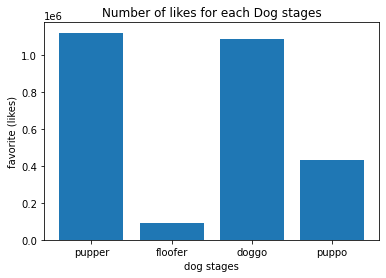

In [83]:
df_dog_stages = df.query('dog_stages != "None"')

plt.bar(df_dog_stages.dog_stages.unique(), df_dog_stages.groupby('dog_stages')['favorite_count'].sum())

plt.xlabel('dog stages')
plt.ylabel('favorite (likes)')
plt.title('Number of likes for each Dog stages')
df_dog_stages.groupby('dog_stages')['favorite_count'].sum()

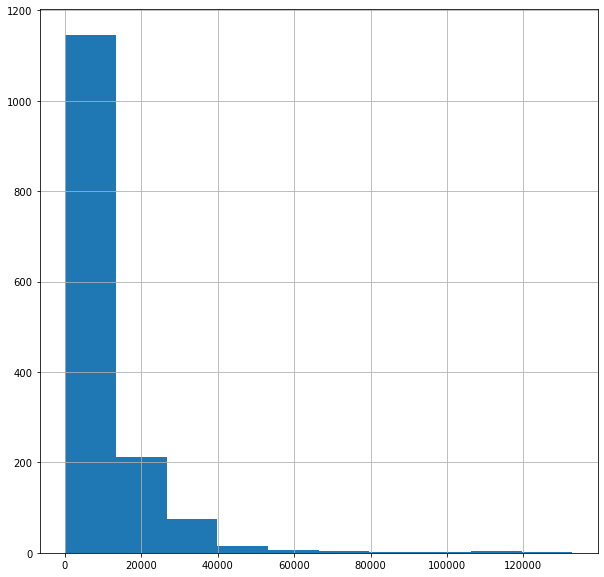

In [45]:
df.favorite_count.hist(figsize = (10,10));

It's observe that it is skew to the right and it is of leptokurtic in nature